In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir('./result/')

In [3]:
parameters = {'xtick.labelsize': 15,
          'ytick.labelsize': 15,
             'legend.fontsize' : 11.2}
plt.rcParams.update(parameters)

## similarity measures considering only the time factor

In [4]:
data_name = 'ciao_dvd' # 100k, 1m, ciao_dvd

In [5]:
mae_1 = []
f1_1 = []

if data_name == 'ciao_dvd':
#     t0_1,ee,genre_tf = [30,10,5],0.5,0.25
    t0_1 = ['120','120','40','40','40','20'] 
else:
    t0_1 = ['30','30','10','10','10','5']
    
for time_decay_func,T0 in zip(['exp','sigmoid','linear','exp','sigmoid','linear'],t0_1):
    df = pd.read_csv('pcc_t'+data_name+time_decay_func+T0+'.csv').iloc[:5,:]
    mae_1.append(df['MAE'].values)
    f1_1.append(df['F1_score'].values)

label_names_1=['EXP ' +t0_1[0],'SIG ' +t0_1[1],'LIN ' +t0_1[2], 'EXP ' +t0_1[3],'SIG ' +t0_1[4],'LIN ' +t0_1[5]]

In [6]:
mae_2 = []
f1_2 = []

if data_name == 'ciao_dvd':
    t0_2 = ['120','40','40','40','30','20']
else:
    t0_2 = ['30','30','10','10','10','5']
    
for time_decay_func,T0 in zip(['exp','sigmoid','linear','exp','sigmoid','linear'],t0_2):
    df = pd.read_csv('cos_t'+data_name+time_decay_func+T0+'.csv').iloc[:5,:]
    mae_2.append(df['MAE'].values)
    f1_2.append(df['F1_score'].values)

label_names_2=['EXP ' +t0_2[0],'SIG ' +t0_2[1],'LIN ' +t0_2[2], 'EXP ' +t0_2[3],'SIG ' +t0_2[4],'LIN ' +t0_2[5]]

In [7]:
mae_3 = []
f1_3 = []

if data_name == 'ciao_dvd':
    t0_3 = ['120','120','40','40','40','20']
else:
    t0_3 = ['30','30','10','10','10','5']
    
for time_decay_func,T0 in zip(['exp','sigmoid','linear','exp','sigmoid','linear'],t0_3):
    df = pd.read_csv('acos_t'+data_name+time_decay_func+T0+'.csv').iloc[:5,:]
    mae_3.append(df['MAE'].values)
    f1_3.append(df['F1_score'].values)
    
label_names_3=['EXP ' +t0_3[0],'SIG ' +t0_3[1],'LIN ' +t0_3[2], 'EXP ' +t0_3[3],'SIG ' +t0_3[4],'LIN ' +t0_3[5]]

In [8]:
mae_4 = []
f1_4 = []

if data_name == 'ciao_dvd':
    t0_4 = ['120','120','40','40','30','20']
else:
    t0_4 = ['30','30','10','10','10','5']
    
for time_decay_func,T0 in zip(['exp','sigmoid','linear','exp','sigmoid','linear'],t0_4):
    df = pd.read_csv('msd_t'+data_name+time_decay_func+T0+'.csv').iloc[:5,:]
    mae_4.append(df['MAE'].values)
    f1_4.append(df['F1_score'].values)
label_names_4=['EXP ' +t0_4[0],'SIG ' +t0_4[1],'LIN ' +t0_4[2], 'EXP ' +t0_4[3],'SIG ' +t0_4[4],'LIN ' +t0_4[5]]

MAE

Text(0, 0.5, 'MAE')

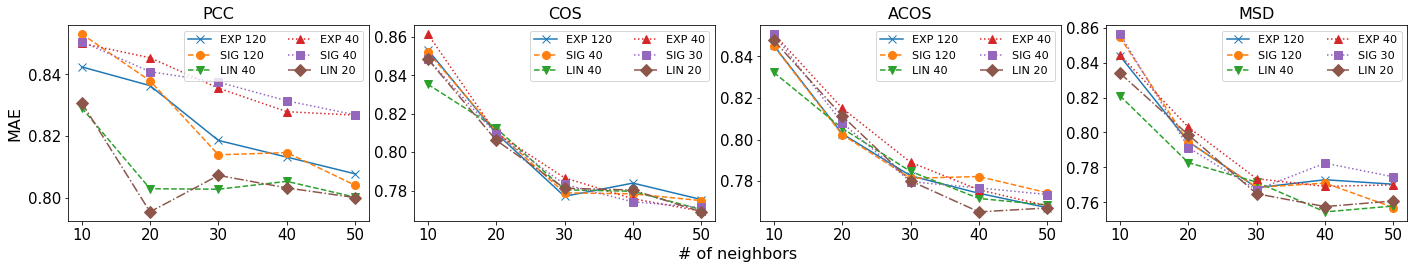

In [9]:
fig, axes = plt.subplots(
    nrows=1, ncols=4, 

    gridspec_kw={'hspace': 0, 'wspace': 0.15},
    figsize=(6*4, 4))
parameters = {'legend.fontsize' : 11.2}

markers = ['x','o','v','^','s','D']
lines = ['-','--','--',':',':','-.']

for f, _ , i,line in  zip(label_names_1,mae_1,np.arange(6),lines):
    axes[0].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[0].set_title('PCC', fontsize=16)
axes[0].legend(label_names_1,loc='upper right',ncol=2) 

for f, _, i,line in zip(label_names_2,mae_2,np.arange(6),lines):
    axes[1].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[1].set_title('COS', fontsize=16)
axes[1].legend(label_names_2,loc='upper right',ncol=2) 

for f, _, i,line in zip(label_names_3,mae_3,np.arange(6),lines):
    axes[2].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)    
axes[2].set_title('ACOS', fontsize=16)    
axes[2].legend(label_names_3,loc='upper right',ncol=2)    

for f, _, i,line in zip(label_names_4,mae_4,np.arange(6),lines):
    axes[3].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)     
axes[3].set_title('MSD', fontsize=16) 
axes[3].legend(label_names_4,loc='upper right',ncol=2)  
    
## adjust the subplot layout
plt.xticks(np.arange(10,60,10))
fig.add_subplot(1, 1, 1, frame_on=False)

# Hiding the axis ticks and tick labels of the bigger plot
plt.tick_params(labelcolor="none", bottom=False, left=False)

# Adding the x-axis and y-axis labels for the bigger plot
plt.gcf().subplots_adjust(bottom=0.20)

plt.xlabel('# of neighbors', fontsize=16)
plt.ylabel('MAE', fontsize=16,labelpad = 15)
plt.savefig('../fig/%s_time_only_mae.png'%(data_name), dpi=600, bbox_inches = 'tight')

F1

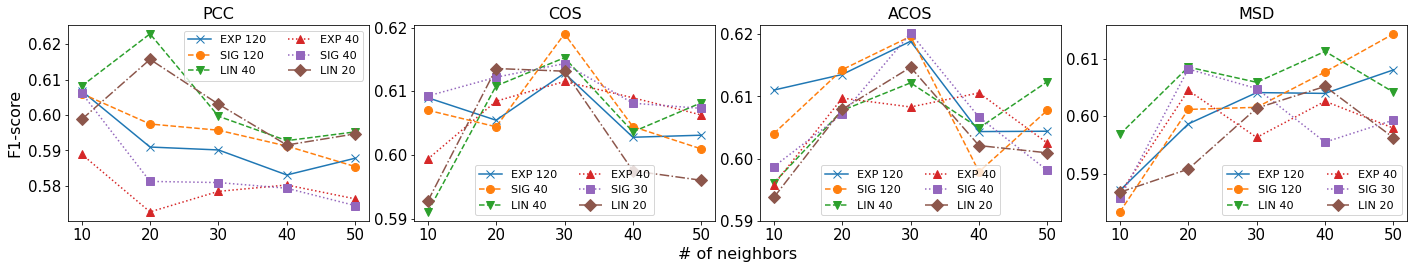

In [10]:
fig, axes = plt.subplots(
    nrows=1, ncols=4, 

    gridspec_kw={'hspace': 0, 'wspace': 0.15},
    figsize=(6*4, 4))

markers = ['x','o','v','^','s','D']
lines = ['-','--','--',':',':','-.']

for f, _ , i,line in  zip(label_names_1,f1_1,np.arange(6),lines):
    axes[0].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[0].set_title('PCC', fontsize=16)
axes[0].legend(label_names_1,loc='upper right',ncol=2)

for f, _, i,line in zip(label_names_2,f1_2,np.arange(6),lines):
    axes[1].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[1].set_title('COS', fontsize=16)
axes[1].legend(label_names_2,loc='lower center',ncol=2) 

for f, _, i,line in zip(label_names_3,f1_3,np.arange(6),lines):
    axes[2].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)    
axes[2].set_title('ACOS', fontsize=16)    
axes[2].legend(label_names_3,loc='lower center',ncol=2)    

for f, _, i,line in zip(label_names_4,f1_4,np.arange(6),lines):
    axes[3].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)     
axes[3].set_title('MSD', fontsize=16)     
axes[3].legend(label_names_4,loc='lower right',ncol=2)  
    
## adjust the subplot layout
plt.xticks(np.arange(10,60,10))
fig.add_subplot(1, 1, 1, frame_on=False)

# Hiding the axis ticks and tick labels of the bigger plot
plt.tick_params(labelcolor="none", bottom=False, left=False)

# Adding the x-axis and y-axis labels for the bigger plot
plt.gcf().subplots_adjust(bottom=0.20)

# fig.text(0.5, 0, '# of neighbors', ha='center', va='center',fontsize=16)
plt.xlabel('# of neighbors', fontsize=16)
plt.ylabel('F1-score', fontsize=16,labelpad = 15)
plt.savefig('../fig/%s_time_only_f1.png'%(data_name), dpi=600, bbox_inches = 'tight')

## similarity measures considering only the genre factor

In [10]:
data_name = 'ciao_dvd'

In [11]:
mae_1 = []
f1_1 = []

    
for genre_tf in ['0.25','0.5','0.75']:
    df = pd.read_csv('pcc_g'+data_name+genre_tf+'~0.99.csv').iloc[:5,:]
    mae_1.append(df['MAE'].values)
    f1_1.append(df['F1_score'].values)
    

label_names_1 = ['G 0.25', 'G 0.5', 'G 0.75']

In [12]:
mae_2 = []
f1_2 = []

for genre_tf in ['0.25','0.5','0.75']:
    df = pd.read_csv('cos_g'+data_name+genre_tf+'~0.99.csv').iloc[:5,:]
    mae_2.append(df['MAE'].values)
    f1_2.append(df['F1_score'].values)
    


In [13]:
mae_3 = []
f1_3 = []

for genre_tf in ['0.25','0.5','0.75']:
    df = pd.read_csv('acos_g'+data_name+genre_tf+'~0.99.csv').iloc[:5,:]
    mae_3.append(df['MAE'].values)
    f1_3.append(df['F1_score'].values)
    


In [14]:
mae_4 = []
f1_4 = []

for genre_tf in ['0.25','0.5','0.75']:
    df = pd.read_csv('msd_g'+data_name+genre_tf+'~0.99.csv').iloc[:5,:]
    mae_4.append(df['MAE'].values)
    f1_4.append(df['F1_score'].values)
    

MAE

Text(0, 0.5, 'MAE')

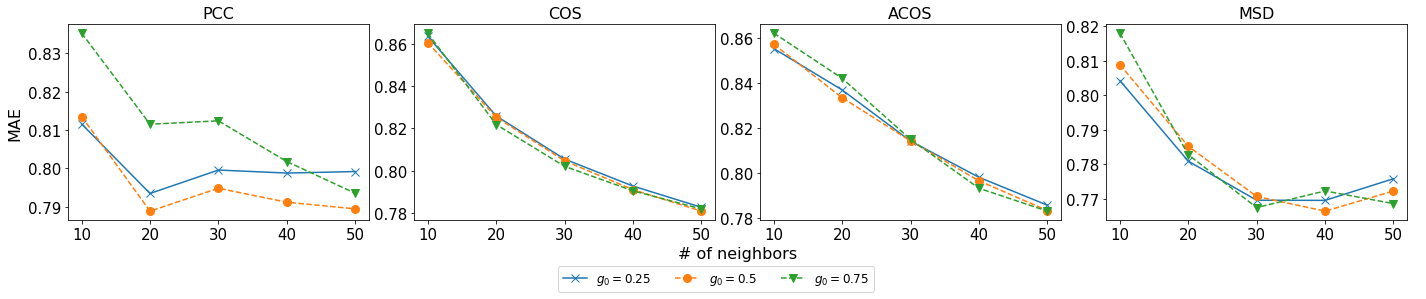

In [15]:
label_names = ['$g_0=0.25$', '$g_0=0.5$', '$g_0=0.75$']

fig, axes = plt.subplots(
    nrows=1, ncols=4, 

    gridspec_kw={'hspace': 0, 'wspace': 0.15},
    figsize=(6*4, 4))

markers = ['x','o','v','^','s','D']
lines = ['-','--','--',':',':','-.']

for f, _ , i,line in zip(label_names,mae_1,np.arange(6),lines):
    axes[0].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[0].set_title('PCC', fontsize=16)
for f, _, i,line in zip(label_names,mae_2,np.arange(6),lines):
    axes[1].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[1].set_title('COS', fontsize=16)

for f, _, i,line in zip(label_names,mae_3,np.arange(6),lines):
    axes[2].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)    
axes[2].set_title('ACOS', fontsize=16)    

for f, _, i,line in zip(label_names,mae_4,np.arange(6),lines):
    axes[3].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)     
axes[3].set_title('MSD', fontsize=16) 
        
    
## adjust the subplot layout
plt.xticks(np.arange(10,60,10))
fig.add_subplot(1, 1, 1, frame_on=False)

# Hiding the axis ticks and tick labels of the bigger plot
plt.tick_params(labelcolor="none", bottom=False, left=False)

# Adding the x-axis and y-axis labels for the bigger plot
plt.gcf().subplots_adjust(bottom=0.20)

fig.legend(label_names, loc="lower center", ncol = 6, bbox_to_anchor=(0.5,-0.07),fontsize=12)
plt.xlabel('# of neighbors', fontsize=16)
plt.ylabel('MAE', fontsize=16,labelpad = 15)
plt.savefig('../fig/%s_genre_mae.png'%(data_name), dpi=600, bbox_inches = 'tight')

F1

Text(0, 0.5, 'F1-score')

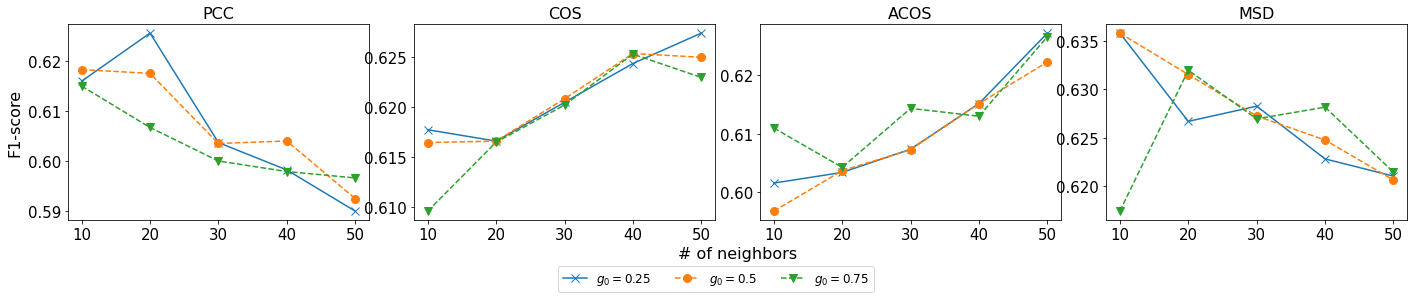

In [16]:
label_names = ['$g_0=0.25$', '$g_0=0.5$', '$g_0=0.75$']

fig, axes = plt.subplots(
    nrows=1, ncols=4, 

    gridspec_kw={'hspace': 0, 'wspace': 0.15},
    figsize=(6*4, 4))

markers = ['x','o','v','^','s','D']
lines = ['-','--','--',':',':','-.']

for f, _ , i,line in zip(label_names,f1_1,np.arange(6),lines):
    axes[0].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[0].set_title('PCC', fontsize=16)
    
for f, _, i,line in zip(label_names,f1_2,np.arange(6),lines):
    axes[1].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[1].set_title('COS', fontsize=16)

for f, _, i,line in zip(label_names,f1_3,np.arange(6),lines):
    axes[2].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[2].set_title('ACOS', fontsize=16)    

for f, _, i,line in zip(label_names,f1_4,np.arange(6),lines):
    axes[3].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[3].set_title('MSD', fontsize=16) 
        
    
## adjust the subplot layout
plt.xticks(np.arange(10,60,10))
fig.add_subplot(1, 1, 1, frame_on=False)

# Hiding the axis ticks and tick labels of the bigger plot
plt.tick_params(labelcolor="none", bottom=False, left=False)

# Adding the x-axis and y-axis labels for the bigger plot
plt.gcf().subplots_adjust(bottom=0.20)

fig.legend(label_names, loc="lower center", ncol = 6, bbox_to_anchor=(0.5,-0.07),fontsize=12)
plt.xlabel('# of neighbors', fontsize=16)
plt.ylabel('F1-score', fontsize=16,labelpad = 15)
plt.savefig('../fig/%s_genre_f1.png'%(data_name), dpi=600, bbox_inches = 'tight')

## similarity measures considering the timea and genre factors

#### fixed the time factor

In [17]:
data_name = 'ciao_dvd'

In [18]:
if data_name == '100k' or data_name=='1m':
    tdf_1 = 'exp10'
else:
    tdf_1 = 'linear20' # linear 10

    
######
mae_1 = []
f1_1 = []

for g in [0.25,0.5,0.75]:
    for e in [0.5,1]:
        df = pd.read_csv('pcc_a'+data_name+str(g)+'~0.99'+tdf_1+str(e)+'.csv').iloc[:5,:]
        mae_1.append(df['MAE'].values)
        f1_1.append(df['F1_score'].values)

In [19]:
if data_name == '100k':
    tdf_2 = 'linear10'
elif data_name == '1m':
    tdf_2 = 'linear10'
else:
    tdf_2 = 'linear40' #sigmoid30
    
######
mae_2 = []
f1_2 = []

for g in [0.25,0.5,0.75]:
    for e in [0.5,1]:
        df = pd.read_csv('cos_a'+data_name+str(g)+'~0.99'+tdf_2+str(e)+'.csv').iloc[:5,:]
        mae_2.append(df['MAE'].values)
        f1_2.append(df['F1_score'].values)

In [20]:
if data_name == '100k':
    tdf_3 = 'linear10'
elif data_name == '1m':
    tdf_3 = 'linear10'

else:
    tdf_3 = 'linear40' #sigmoid30
    
######
mae_3 = []
f1_3 = []

for g in [0.25,0.5,0.75]:
    for e in [0.5,1]:
        df = pd.read_csv('acos_a'+data_name+str(g)+'~0.99'+tdf_3+str(e)+'.csv').iloc[:5,:]
        mae_3.append(df['MAE'].values)
        f1_3.append(df['F1_score'].values)


In [21]:
if data_name == '100k':
    tdf_4 = 'linear10'
elif data_name == '1m':
    tdf_4 = 'linear10'

else:
    tdf_4 = 'linear40' #sigmoid30
    
######
mae_4 = []
f1_4 = []

for g in [0.25,0.5,0.75]:
    for e in [0.5,1]:
        df = pd.read_csv('msd_a'+data_name+str(g)+'~0.99'+tdf_4+str(e)+'.csv').iloc[:5,:]
        mae_4.append(df['MAE'].values)
        f1_4.append(df['F1_score'].values)

MAE

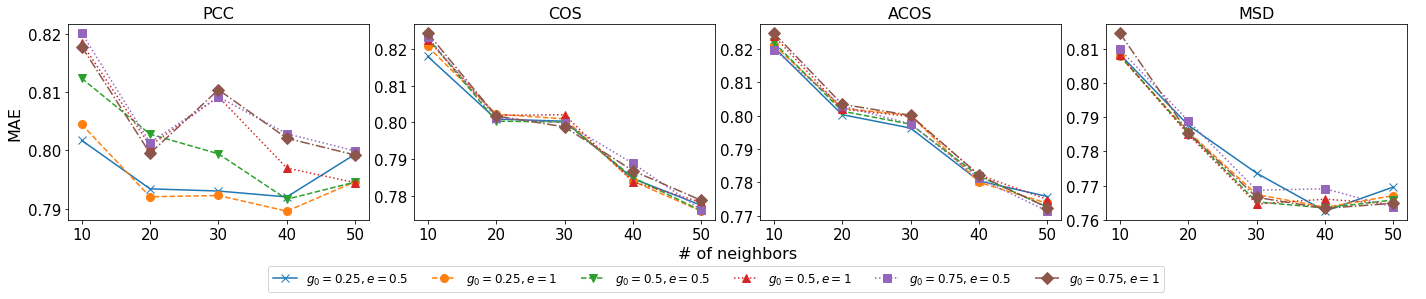

In [38]:
label_names=[]
for g in [0.25,0.5,0.75]:
    for e in [0.5,1]:
        label_names.append(f'$g_0={g}, e={e}$')

fig, axes = plt.subplots(
    nrows=1, ncols=4, 

    gridspec_kw={'hspace': 0, 'wspace': 0.15},
    figsize=(6*4, 4))

markers = ['x','o','v','^','s','D']
lines = ['-','--','--',':',':','-.']

for f, _ , i,line in zip(label_names,mae_1,np.arange(6),lines):
    axes[0].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[0].set_title('PCC', fontsize=16)
for f, _, i,line in zip(label_names,mae_2,np.arange(6),lines):
    axes[1].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[1].set_title('COS', fontsize=16)

for f, _, i,line in zip(label_names,mae_3,np.arange(6),lines):
    axes[2].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)     
axes[2].set_title('ACOS', fontsize=16)    

for f, _, i,line in zip(label_names,mae_4,np.arange(6),lines):
    axes[3].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)     
axes[3].set_title('MSD', fontsize=16) 
            
## adjust the subplot layout
plt.xticks(np.arange(10,60,10))
fig.add_subplot(1, 1, 1, frame_on=False)

# Hiding the axis ticks and tick labels of the bigger plot
plt.tick_params(labelcolor="none", bottom=False, left=False)

# Adding the x-axis and y-axis labels for the bigger plot
plt.gcf().subplots_adjust(bottom=0.20)

fig.legend(label_names, loc="lower center", ncol = 6, bbox_to_anchor=(0.5,-0.07),fontsize=12)
plt.xlabel('# of neighbors', fontsize=16)
plt.ylabel('MAE', fontsize=16,labelpad = 15)
plt.savefig('../fig/%s_genre&e_mae.png'%(data_name), dpi=600, bbox_inches = 'tight')

F1

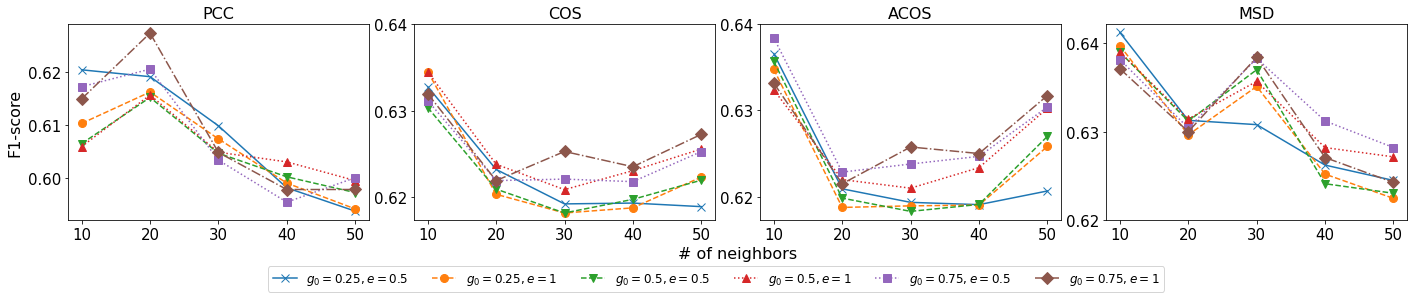

In [41]:
fig, axes = plt.subplots(
    nrows=1, ncols=4, 

    gridspec_kw={'hspace': 0, 'wspace': 0.15},
    figsize=(6*4, 4))


for f, _ , i,line in zip(label_names,f1_1,np.arange(6),lines):
    axes[0].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[0].set_title('PCC', fontsize=16)
    
for f, _, i,line in zip(label_names,f1_2,np.arange(6),lines):
    axes[1].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[1].set_title('COS', fontsize=16)
for f, _, i,line in zip(label_names,f1_3,np.arange(6),lines):
    axes[2].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)     
axes[2].set_title('ACOS', fontsize=16)    
for f, _, i,line in zip(label_names,f1_4,np.arange(6),lines):
    axes[3].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)     
axes[3].set_title('MSD', fontsize=16) 

## adjust the subplot layout
plt.xticks(np.arange(10,60,10))
fig.add_subplot(1, 1, 1, frame_on=False)

# Hiding the axis ticks and tick labels of the bigger plot
plt.tick_params(labelcolor="none", bottom=False, left=False)

# Adding the x-axis and y-axis labels for the bigger plot
plt.gcf().subplots_adjust(bottom=0.20)

fig.legend(label_names, loc="lower center", ncol = 6, bbox_to_anchor=(0.5,-0.07),fontsize=12)
plt.xlabel('# of neighbors', fontsize=16)
plt.ylabel('F1-score', fontsize=16,labelpad = 15)
plt.savefig('../fig/%s_genre&e_f1.png'%(data_name), dpi=600, bbox_inches = 'tight')

#### fixed the genre factor

In [75]:
data_name = '1m'

In [76]:
if data_name == '100k' or data_name=='1m':
    genre_1 = 0.25
    tdf_1 = ['exp10','sigmoid10','linear5']
else:
    genre_1 = 0.5 
    tdf_1 = ['exp40','sigmoid10','linear5']
    
######
mae_1 = []
f1_1 = []

for t in tdf_1:
    for e in [0.5,1]:
        df = pd.read_csv('pcc_a'+data_name+str(genre_1)+'~0.99'+t+str(e)+'.csv').iloc[:5,:]
        mae_1.append(df['MAE'].values)
        f1_1.append(df['F1_score'].values)

In [77]:
if data_name == '100k':
    genre_2 = 0.5
    tdf_2 = ['exp10','sigmoid10','linear5']
elif data_name == '1m':
    genre_2 = 0.75
    tdf_2 = ['exp10','sigmoid10','linear5']
else:
    genre_2 = 0.5
    tdf_2 = ['exp30','sigmoid30','linear5']
    
######
mae_2 = []
f1_2 = []

for t in tdf_2:
    for e in [0.5,1]:
        df = pd.read_csv('cos_a'+data_name+str(genre_2)+'~0.99'+t+str(e)+'.csv').iloc[:5,:]
        mae_2.append(df['MAE'].values)
        f1_2.append(df['F1_score'].values)

In [78]:
if data_name == '100k':
    genre_3 = 0.25
    tdf_3 = ['exp10','sigmoid10','linear5']
elif data_name == '1m':
    genre_3 = 0.75
    tdf_3 = ['exp10','sigmoid10','linear5']
else:
    genre_3 = 0.5
    tdf_3 = ['exp120','sigmoid120','linear5']
    
######
mae_3 = []
f1_3 = []

for t in tdf_3:
    for e in [0.5,1]:
        df = pd.read_csv('acos_a'+data_name+str(genre_3)+'~0.99'+t+str(e)+'.csv').iloc[:5,:]
        mae_3.append(df['MAE'].values)
        f1_3.append(df['F1_score'].values)

In [79]:
if data_name == '100k':
    genre_4 = 0.75
    tdf_4 = ['exp10','sigmoid10','linear5']
elif data_name == '1m':
    genre_4 = 0.75
    tdf_4 = ['exp10','sigmoid10','linear5']
else:
    genre_4 = 0.5
    tdf_4 = ['exp120','sigmoid120','linear20']
    
######
mae_4 = []
f1_4 = []

for t in tdf_4:
    for e in [0.5,1]:
        df = pd.read_csv('msd_a'+data_name+str(genre_4)+'~0.99'+t+str(e)+'.csv').iloc[:5,:]
        mae_4.append(df['MAE'].values)
        f1_4.append(df['F1_score'].values)

MAE

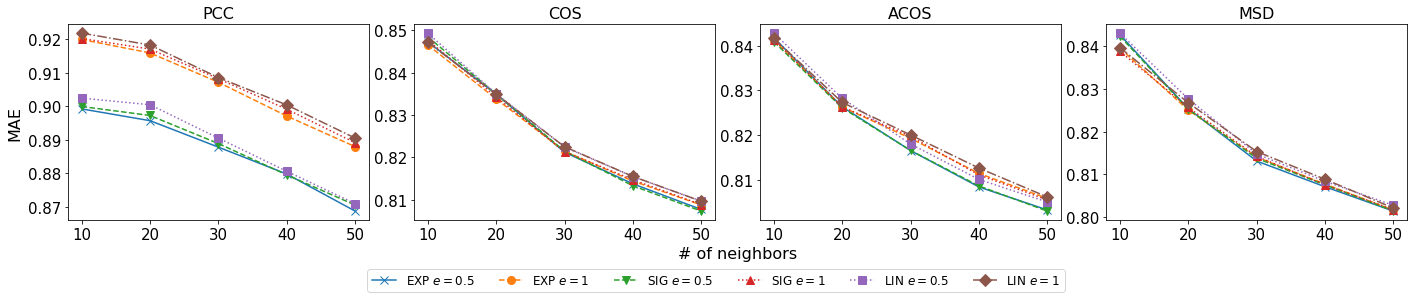

In [80]:
label_names=[]
for t in ['EXP','SIG','LIN']:
    for e in [0.5,1]:
        label_names.append(f'{t} $e={e}$')

fig, axes = plt.subplots(
    nrows=1, ncols=4, 

    gridspec_kw={'hspace': 0, 'wspace': 0.15},
    figsize=(6*4, 4))

markers = ['x','o','v','^','s','D']
lines = ['-','--','--',':',':','-.']

for f, _ , i,line in zip(label_names,mae_1,np.arange(6),lines):
    axes[0].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[0].set_title('PCC', fontsize=16)
for f, _, i,line in zip(label_names,mae_2,np.arange(6),lines):
    axes[1].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[1].set_title('COS', fontsize=16)

for f, _, i,line in zip(label_names,mae_3,np.arange(6),lines):
    axes[2].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)     
axes[2].set_title('ACOS', fontsize=16)    

for f, _, i,line in zip(label_names,mae_4,np.arange(6),lines):
    axes[3].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)     
axes[3].set_title('MSD', fontsize=16) 
            
## adjust the subplot layout
plt.xticks(np.arange(10,60,10))
fig.add_subplot(1, 1, 1, frame_on=False)

# Hiding the axis ticks and tick labels of the bigger plot
plt.tick_params(labelcolor="none", bottom=False, left=False)

# Adding the x-axis and y-axis labels for the bigger plot
plt.gcf().subplots_adjust(bottom=0.20)

fig.legend(label_names, loc="lower center", ncol = 6, bbox_to_anchor=(0.5,-0.07),fontsize=12)
plt.xlabel('# of neighbors', fontsize=16)
plt.ylabel('MAE', fontsize=16,labelpad = 15)
plt.savefig('../fig/%s_time&e_mae.png'%(data_name), dpi=600, bbox_inches = 'tight')

F1

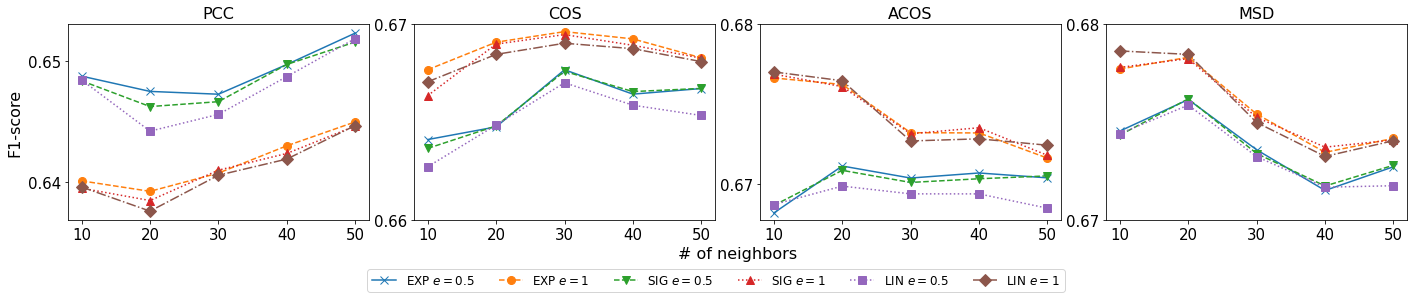

In [84]:
fig, axes = plt.subplots(
    nrows=1, ncols=4, 

    gridspec_kw={'hspace': 0, 'wspace': 0.15},
    figsize=(6*4, 4))


for f, _ , i,line in zip(label_names,f1_1,np.arange(6),lines):
    axes[0].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[0].set_title('PCC', fontsize=16)
 
for f, _, i,line in zip(label_names,f1_2,np.arange(6),lines):
    axes[1].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[1].set_title('COS', fontsize=16)

for f, _, i,line in zip(label_names,f1_3,np.arange(6),lines):
    axes[2].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)     
axes[2].set_title('ACOS', fontsize=16)    

for f, _, i,line in zip(label_names,f1_4,np.arange(6),lines):
    axes[3].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)     
axes[3].set_title('MSD', fontsize=16) 

## adjust the subplot layout
plt.xticks(np.arange(10,60,10))
fig.add_subplot(1, 1, 1, frame_on=False)

# Hiding the axis ticks and tick labels of the bigger plot
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.gcf().subplots_adjust(bottom=0.20)

fig.legend(label_names, loc="lower center", ncol = 6, bbox_to_anchor=(0.5,-0.07),fontsize=12)
plt.xlabel('# of neighbors', fontsize=16)
plt.ylabel('F1-score', fontsize=16,labelpad = 15)
plt.savefig('../fig/%s_time&e_f1.png'%(data_name), dpi=600, bbox_inches = 'tight')

## compare similarity measures

In [21]:
data_name = 'ciao_dvd'

In [22]:
if data_name == '100k' or data_name=='1m':
    tdf_1_t = 'exp10'
    ee_1,genre_tf_1,tdf_1=0.5,0.25,'exp10'
else:
    tdf_1_t = 'linear20' # linear 10
    ee_1,genre_tf_1,tdf_1=0.5,0.5,'sigmoid10'
    
######
mae_1 = []
f1_1 = []

df = pd.read_csv('pcc_b'+data_name+'.csv').iloc[:5,:]
mae_1.append(df['MAE'].values)
f1_1.append(df['F1_score'].values)

df = pd.read_csv('pcc_t'+data_name+tdf_1_t+'.csv').iloc[:5,:]
mae_1.append(df['MAE'].values)
f1_1.append(df['F1_score'].values)

df = pd.read_csv('pcc_g'+data_name+str(genre_tf_1)+'~0.99.csv').iloc[:5,:]
mae_1.append(df['MAE'].values)
f1_1.append(df['F1_score'].values)
    

df = pd.read_csv('pcc_a'+data_name+str(genre_tf_1)+'~0.99'+tdf_1+str(ee_1)+'.csv').iloc[:5,:]
mae_1.append(df['MAE'].values)
f1_1.append(df['F1_score'].values)

In [23]:
if data_name == '100k':
    tdf_2_t = 'linear10'
    genre_tf_2_g = 0.25
    ee_2,genre_tf_2,tdf_2=0.5,0.25,'exp10'
elif data_name == '1m':
    tdf_2_t = 'linear10'
    genre_tf_2_g = 0.75
    ee_2,genre_tf_2,tdf_2=0.5,0.75,'exp10'
else:
    tdf_2_t = 'linear40' #sigmoid30
    genre_tf_2_g = 0.75
    ee_2,genre_tf_2,tdf_2=0.5,0.75,'sigmoid30'
    
######
mae_2 = []
f1_2 = []

df = pd.read_csv('cos_b'+data_name+'.csv').iloc[:5,:]
mae_2.append(df['MAE'].values)
f1_2.append(df['F1_score'].values)

df = pd.read_csv('cos_t'+data_name+tdf_2_t+'.csv').iloc[:5,:]
mae_2.append(df['MAE'].values)
f1_2.append(df['F1_score'].values)

df = pd.read_csv('cos_g'+data_name+str(genre_tf_2_g)+'~0.99.csv').iloc[:5,:]
mae_2.append(df['MAE'].values)
f1_2.append(df['F1_score'].values)
    

df = pd.read_csv('cos_a'+data_name+str(genre_tf_2)+'~0.99'+tdf_2+str(ee_2)+'.csv').iloc[:5,:]
mae_2.append(df['MAE'].values)
f1_2.append(df['F1_score'].values)

In [24]:
if data_name == '100k':
    tdf_3_t = 'linear10'
    genre_tf_3_g = 0.5
    ee_3,genre_tf_3,tdf_3=0.5,0.25,'exp10'
elif data_name == '1m':
    tdf_3_t = 'linear10'
    genre_tf_3_g = 0.75
    ee_3,genre_tf_3,tdf_3=1,0.75,'exp10'
else:
    tdf_3_t = 'linear40' #linear10
    genre_tf_3_g = 0.5
    ee_3,genre_tf_3,tdf_3=0.5,0.5,'exp120'
    
######
mae_3 = []
f1_3 = []

df = pd.read_csv('acos_b'+data_name+'.csv').iloc[:5,:]
mae_3.append(df['MAE'].values)
f1_3.append(df['F1_score'].values)

df = pd.read_csv('acos_t'+data_name+tdf_3_t+'.csv').iloc[:5,:]
mae_3.append(df['MAE'].values)
f1_3.append(df['F1_score'].values)

df = pd.read_csv('acos_g'+data_name+str(genre_tf_3_g)+'~0.99.csv').iloc[:5,:]
mae_3.append(df['MAE'].values)
f1_3.append(df['F1_score'].values)
    

df = pd.read_csv('acos_a'+data_name+str(genre_tf_3)+'~0.99'+tdf_3+str(ee_3)+'.csv').iloc[:5,:]
mae_3.append(df['MAE'].values)
f1_3.append(df['F1_score'].values)

In [25]:
if data_name == '100k':
    tdf_4_t = 'linear10'
    genre_tf_4_g = 0.75
    ee_4,genre_tf_4,tdf_4=0.5,0.75,'exp10'
elif data_name == '1m':
    tdf_4_t = 'linear10'
    genre_tf_4_g = 0.75
    ee_4,genre_tf_4,tdf_4=1,0.75,'exp10'
else:
    tdf_4_t = 'linear40' #linear10
    genre_tf_4_g = 0.25
    ee_4,genre_tf_4,tdf_4=1,0.5,'linear20' # linear10
    
######
mae_4 = []
f1_4 = []

df = pd.read_csv('msd_b'+data_name+'.csv').iloc[:5,:]
mae_4.append(df['MAE'].values)
f1_4.append(df['F1_score'].values)

df = pd.read_csv('msd_t'+data_name+tdf_4_t+'.csv').iloc[:5,:]
mae_4.append(df['MAE'].values)
f1_4.append(df['F1_score'].values)

df = pd.read_csv('msd_g'+data_name+str(genre_tf_4_g)+'~0.99.csv').iloc[:5,:]
mae_4.append(df['MAE'].values)
f1_4.append(df['F1_score'].values)
    

df = pd.read_csv('msd_a'+data_name+str(genre_tf_4)+'~0.99'+tdf_4+str(ee_4)+'.csv').iloc[:5,:]
mae_4.append(df['MAE'].values)
f1_4.append(df['F1_score'].values)

MAE

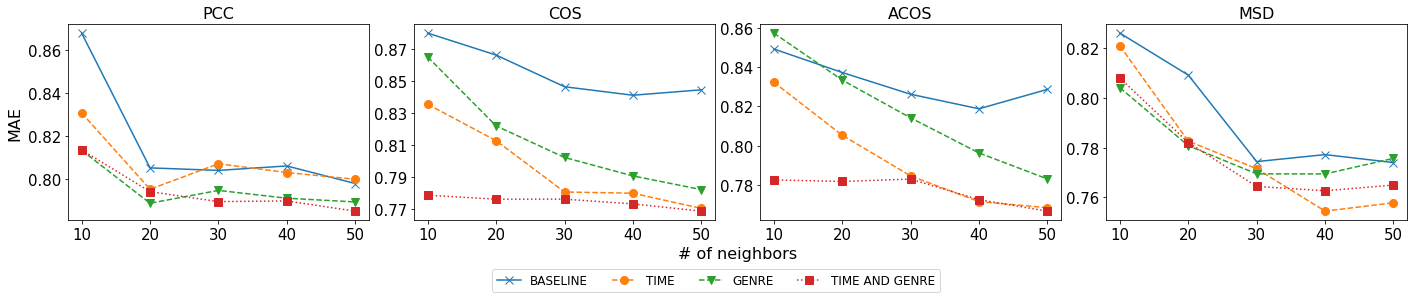

In [29]:
label_names = ['BASELINE','TIME','GENRE','TIME AND GENRE']

fig, axes = plt.subplots(
    nrows=1, ncols=4, 

    gridspec_kw={'hspace': 0, 'wspace': 0.15},
    figsize=(6*4, 4))

markers = ['x','o','v','s']
lines = ['-','--','--',':']

for f, _ , i,line in zip(label_names,mae_1,np.arange(6),lines):
    axes[0].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[0].set_title('PCC', fontsize=16)
    
for f, _, i,line in zip(label_names,mae_2,np.arange(6),lines):
    axes[1].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[1].set_yticks(np.arange(0.77,0.88,0.02))
axes[1].set_title('COS', fontsize=16)

for f, _, i,line in zip(label_names,mae_3,np.arange(6),lines):
    axes[2].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)     
axes[2].set_title('ACOS', fontsize=16)    

for f, _, i,line in zip(label_names,mae_4,np.arange(6),lines):
    axes[3].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)     
axes[3].set_title('MSD', fontsize=16) 
            
## adjust the subplot layout
plt.xticks(np.arange(10,60,10))
fig.add_subplot(1, 1, 1, frame_on=False)

# Hiding the axis ticks and tick labels of the bigger plot
plt.tick_params(labelcolor="none", bottom=False, left=False)

# Adding the x-axis and y-axis labels for the bigger plot
plt.gcf().subplots_adjust(bottom=0.20)

# fig.text(0.5, 0, '# of neighbors', ha='center', va='center',fontsize=16)
fig.legend(label_names_final, loc="lower center", ncol = 6, bbox_to_anchor=(0.5,-0.07),fontsize=12)
plt.xlabel('# of neighbors', fontsize=16)
plt.ylabel('MAE', fontsize=16,labelpad = 15)
plt.savefig('../fig/%s_final_mae.png'%(data_name), dpi=600, bbox_inches = 'tight')

F1

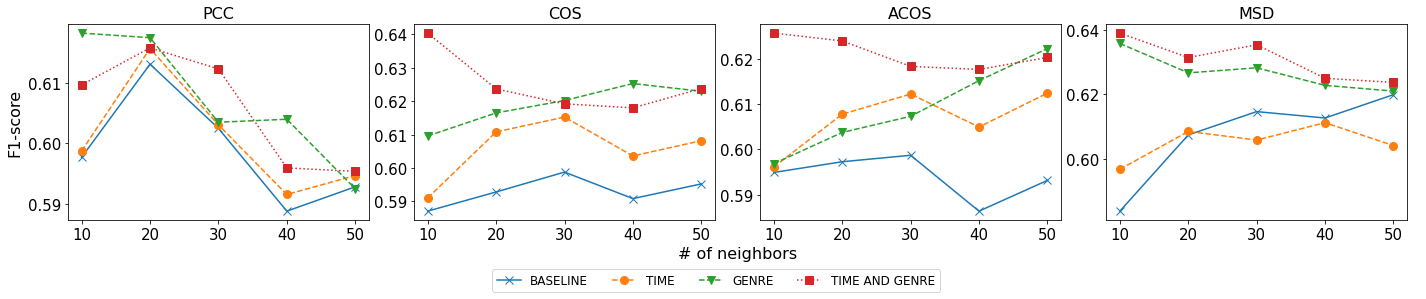

In [30]:
label_names = ['BASELINE','TIME','GENRE','TIME AND GENRE']

fig, axes = plt.subplots(
    nrows=1, ncols=4, 

    gridspec_kw={'hspace': 0, 'wspace': 0.15},
    figsize=(6*4, 4))

markers = ['x','o','v','s']
lines = ['-','--','--',':']

for f, _ , i,line in zip(label_names,f1_1,np.arange(6),lines):
    axes[0].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[0].set_title('PCC', fontsize=16)
    
for f, _, i,line in zip(label_names,f1_2,np.arange(6),lines):
    axes[1].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)
axes[1].set_title('COS', fontsize=16)

for f, _, i,line in zip(label_names,f1_3,np.arange(6),lines):
    axes[2].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)     
axes[2].set_title('ACOS', fontsize=16)    

for f, _, i,line in zip(label_names,f1_4,np.arange(6),lines):
    axes[3].plot(np.arange(10,60,10),_,line,label=f,marker=markers[i],markersize=8)     
axes[3].set_title('MSD', fontsize=16) 
            
## adjust the subplot layout
plt.xticks(np.arange(10,60,10))
fig.add_subplot(1, 1, 1, frame_on=False)

# Hiding the axis ticks and tick labels of the bigger plot
plt.tick_params(labelcolor="none", bottom=False, left=False)

# Adding the x-axis and y-axis labels for the bigger plot
plt.gcf().subplots_adjust(bottom=0.20)

fig.legend(label_names_final, loc="lower center", ncol = 6, bbox_to_anchor=(0.5,-0.07),fontsize=12)
plt.xlabel('# of neighbors', fontsize=16)
plt.ylabel('F1-score', fontsize=16,labelpad = 15)
plt.savefig('../fig/%s_final_f1.png'%(data_name), dpi=600, bbox_inches = 'tight')